# Task 2 

## Home Loans - AutoML vs Bespoke ML

the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.

To improve the manual application process Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

Data science lifecycle:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 


Perform the AutoML and then the traditional ML.



## Import Libraries




In [1]:
#!pip install sweetviz 
#uncomment the above if you need to install the library 
#!pip install auto-sklearn
#uncomment the above if you need to install the library 

In [2]:
#!pip install scikit-learn==0.24

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
#import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


# Import Package and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch   # Used for reordering the correlation matrix

import sklearn 
%matplotlib inline

import joblib,time
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,roc_curve,roc_auc_score,f1_score
# grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

C:\Users\anjal\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Import Datasets

In [4]:
path = 'D:/JOB PREP/Projects/Home Loan Space/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

## EDA

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
# Shape of dataset
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
#featureset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
# Overview of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [13]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP001015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367.0,NaN,NaN,NaN,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,NaN,NaN,NaN,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,362.0,NaN,NaN,NaN,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,NaN,NaN,NaN,342.537396,65.156643,6.0,360.0,360.0,360.0,480.0


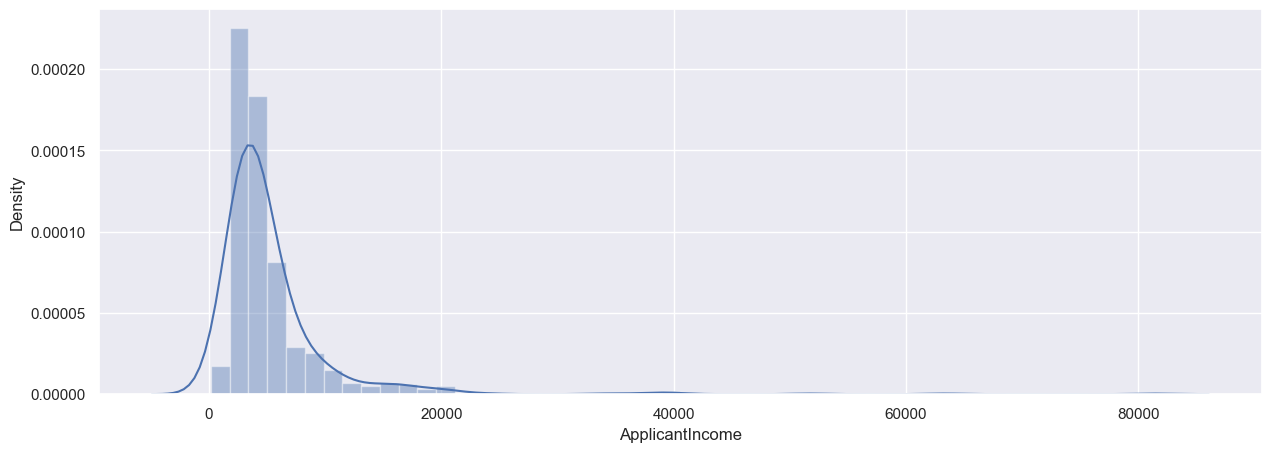

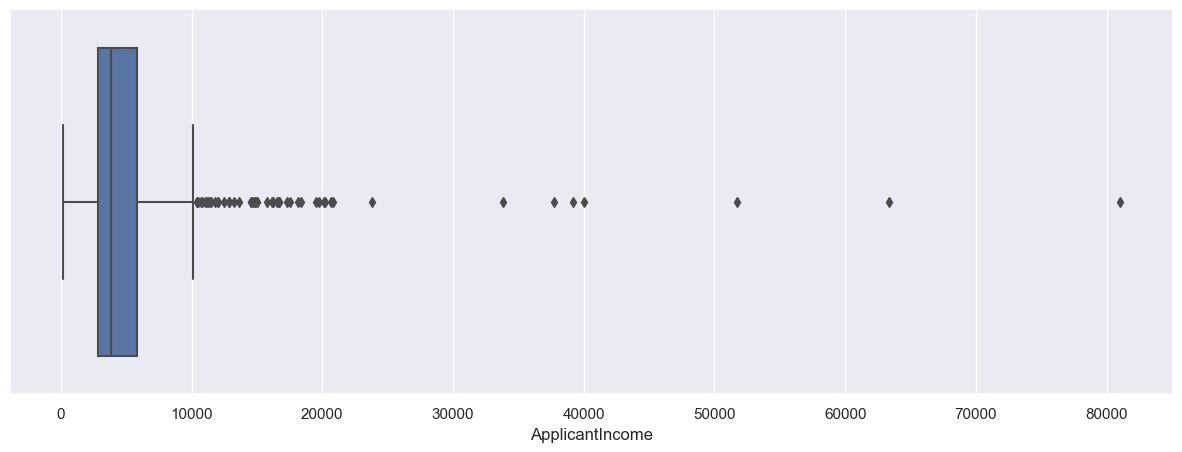

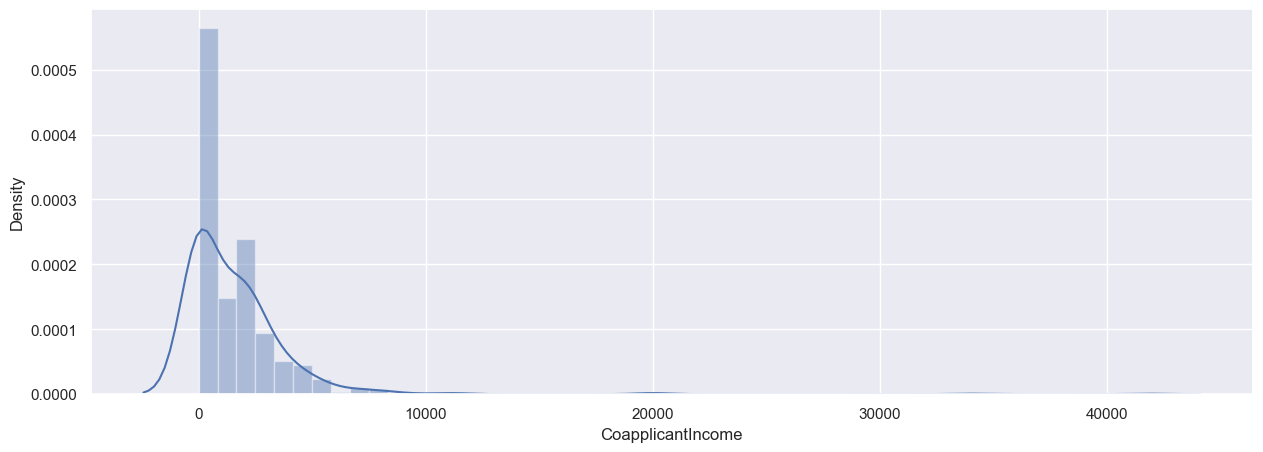

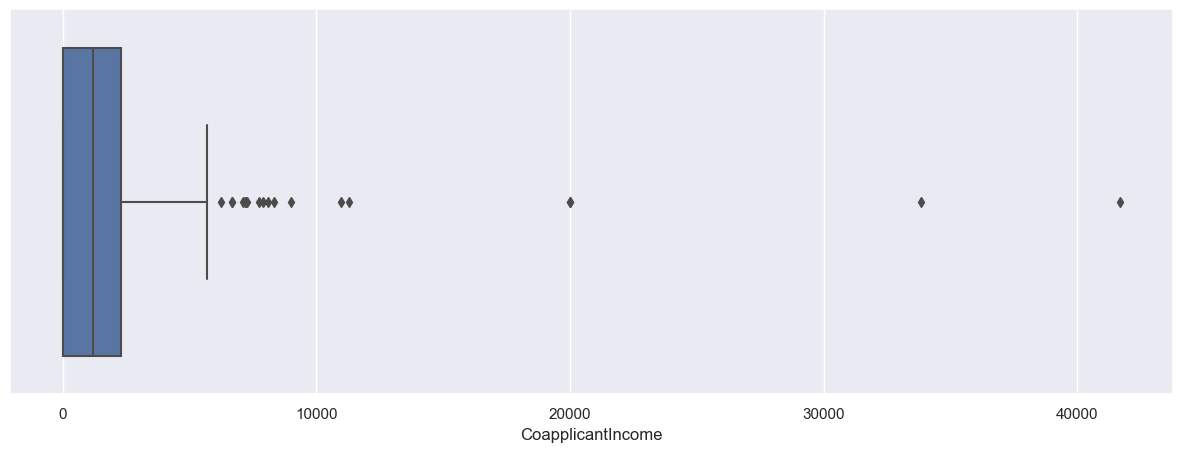

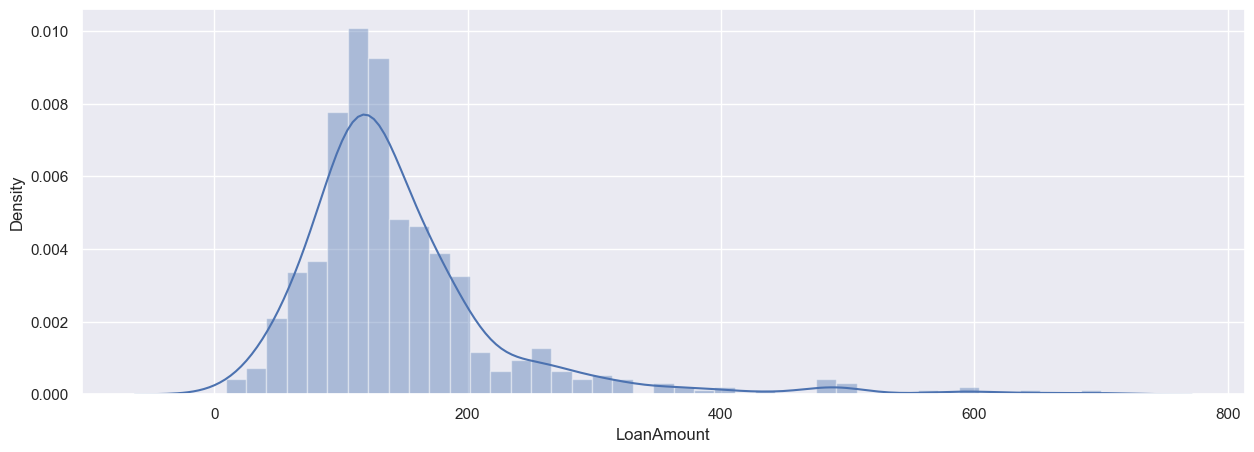

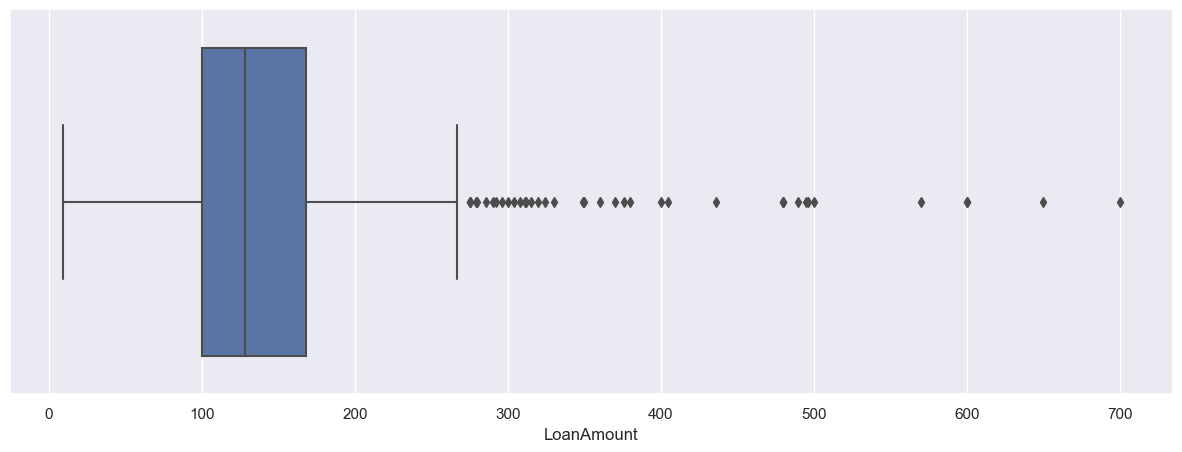

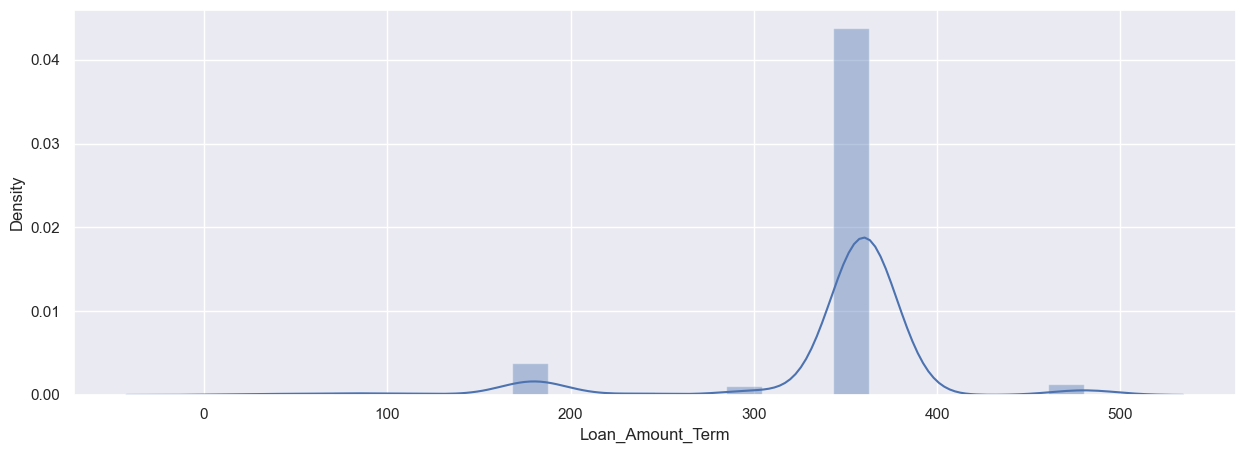

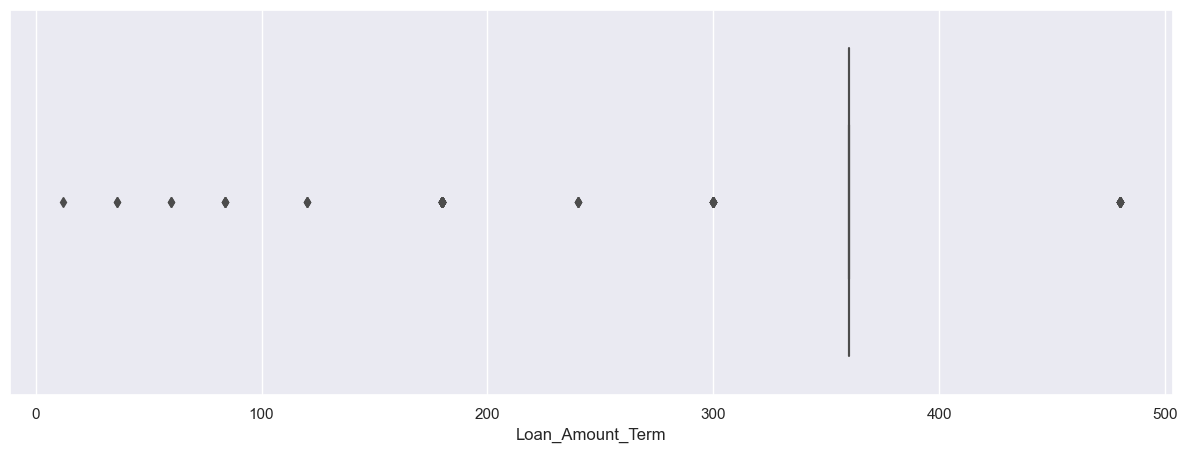

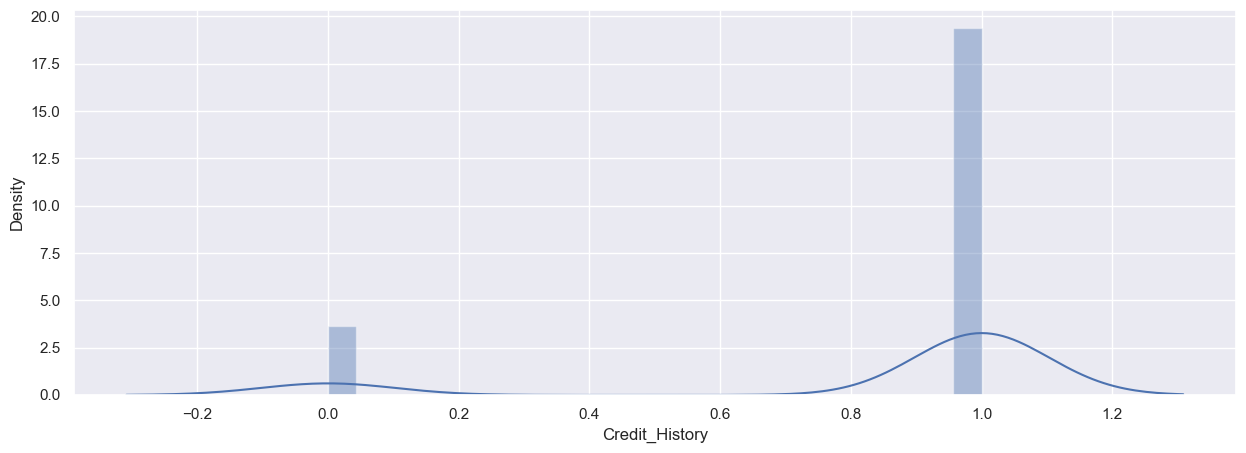

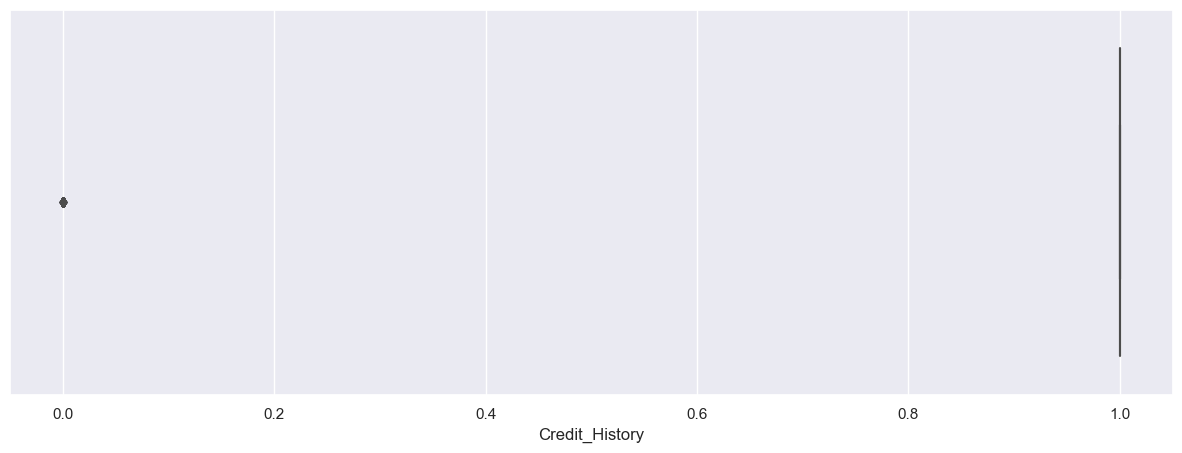

ApplicantIncome      None
CoapplicantIncome    None
LoanAmount           None
Loan_Amount_Term     None
Credit_History       None
dtype: object


In [14]:
# Get all numeric columns
numeric_columns = list(train.select_dtypes(include=[np.number]).columns)

numeric_df = train[numeric_columns]

#Plot histogram is a representation of the distribution of dataset.
sns.set(rc={'figure.figsize':(15,5)})

#Explore Top values from Features
def find_distribution(x):
    sns.set(rc={'figure.figsize':(15,5)})
    sns.distplot(x)
    plt.show()
    
    sns.boxplot(x)
    plt.show()
    
    
print(numeric_df.apply(find_distribution))

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term has outliers

### Sweetviz

                                             |                                             | [  0%]   00:00 ->…


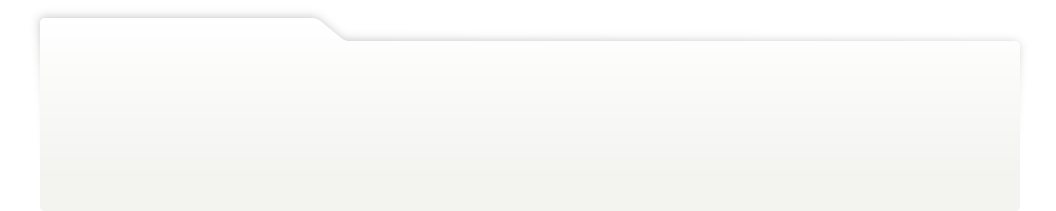
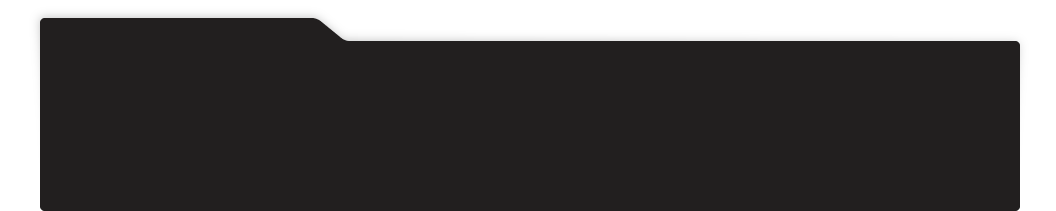
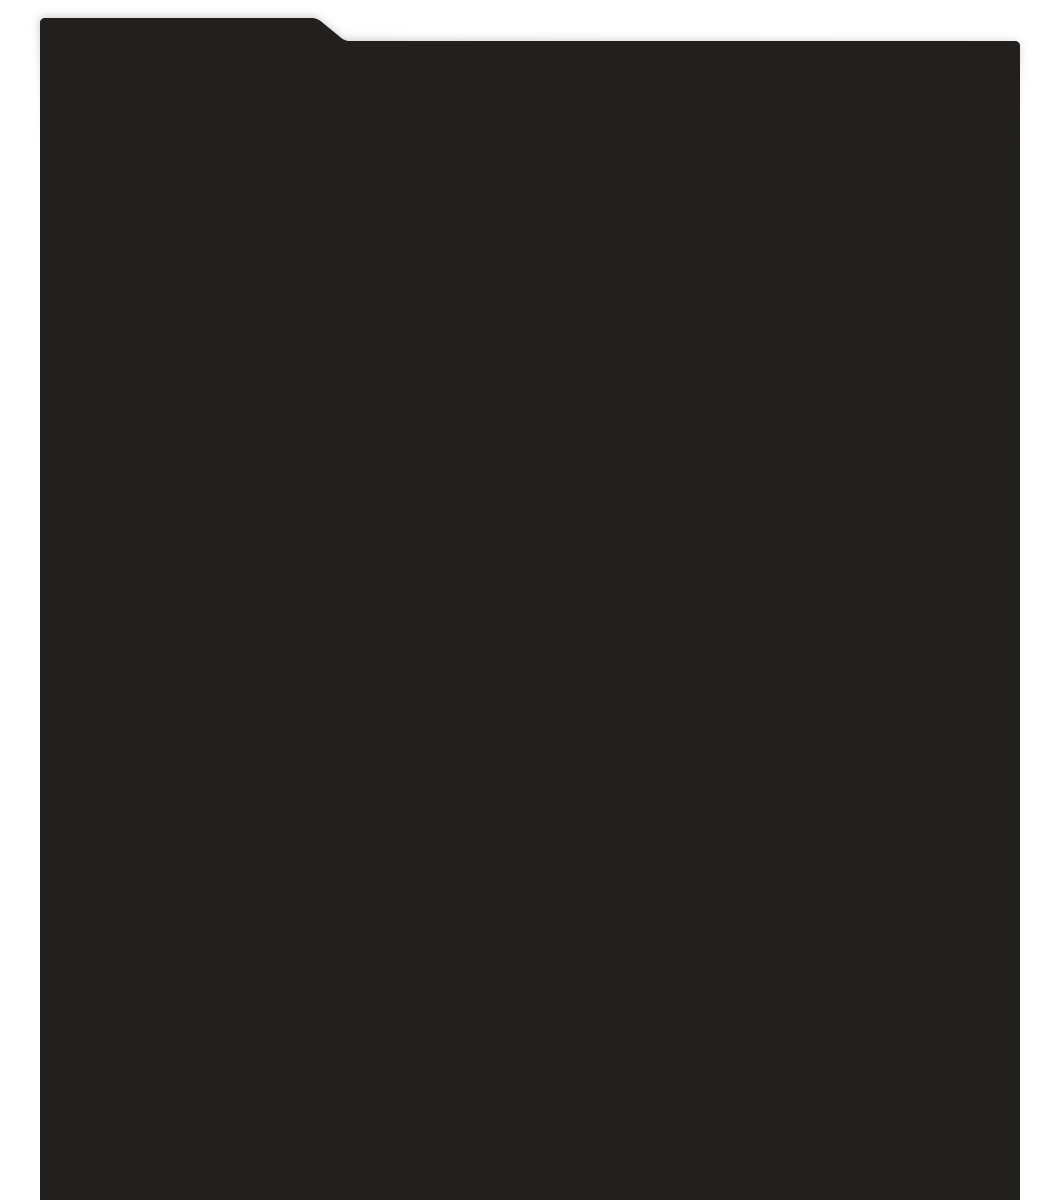
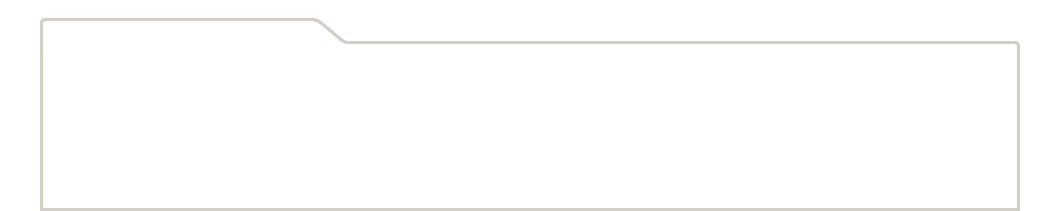
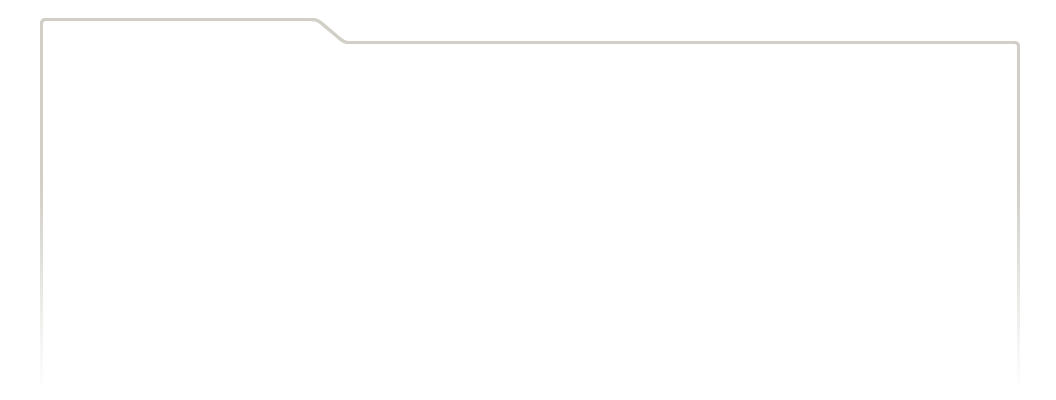
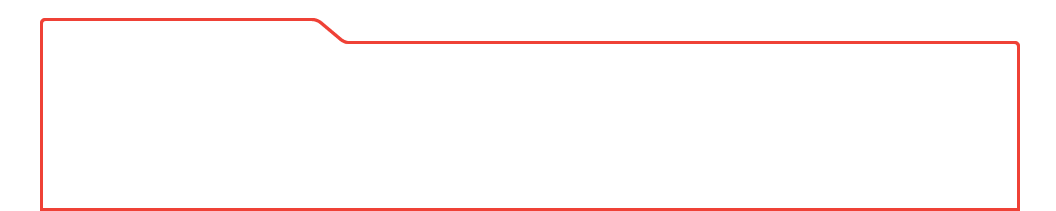
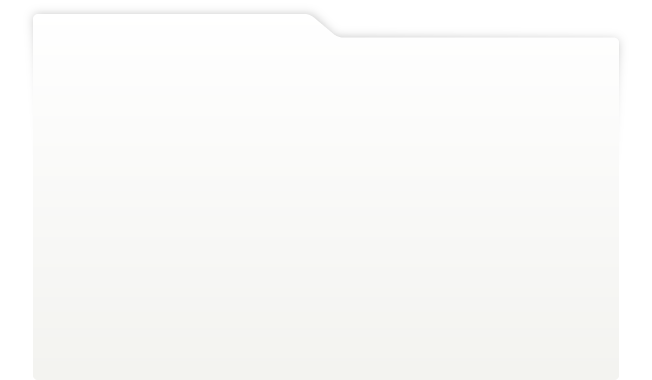
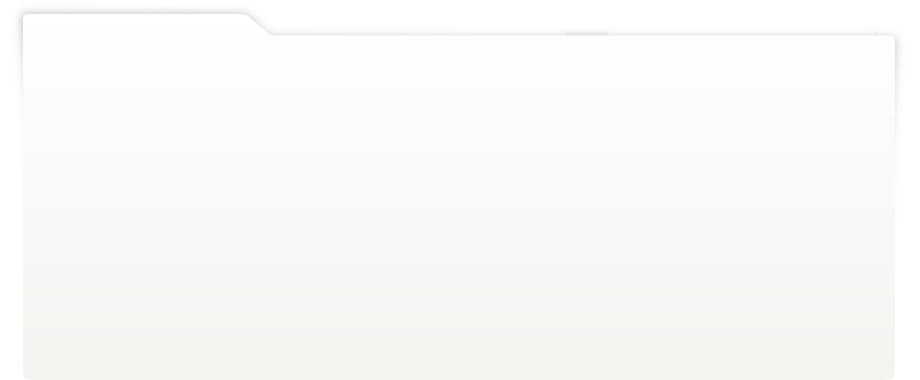
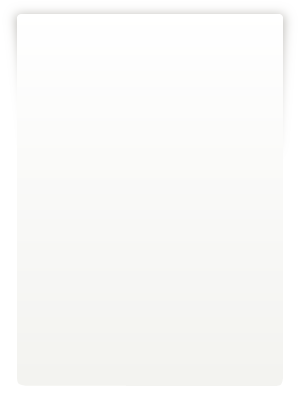
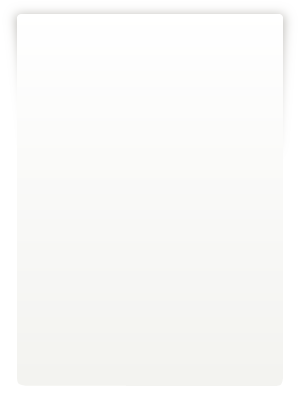
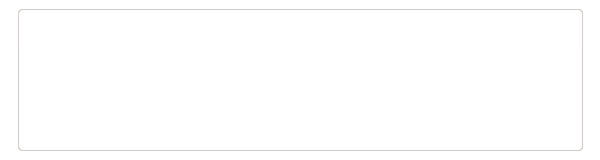
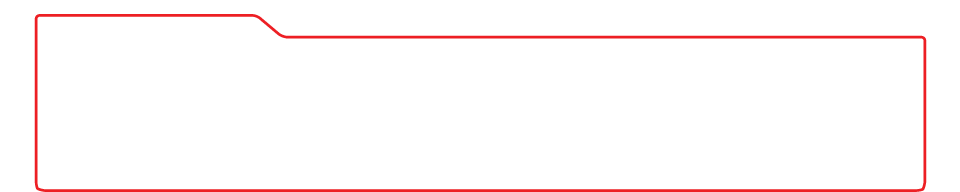
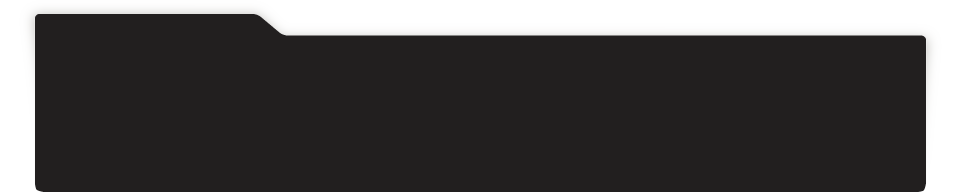
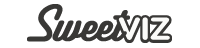
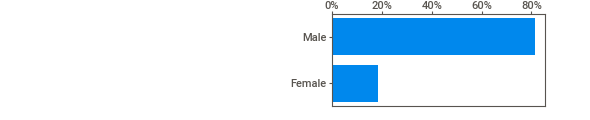
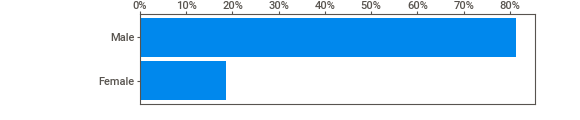
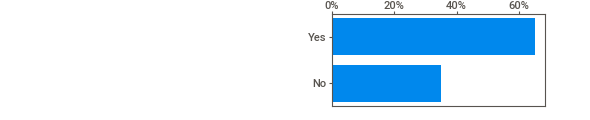
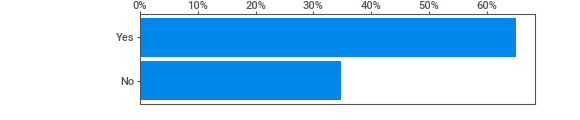
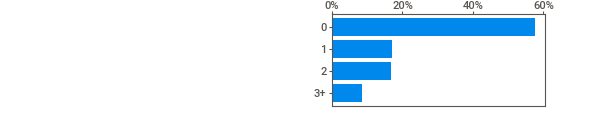
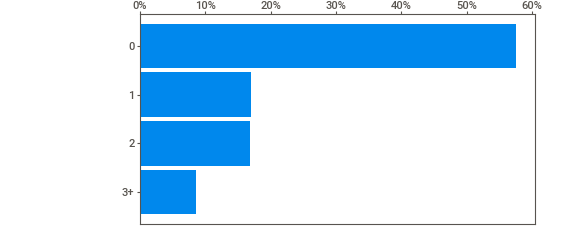
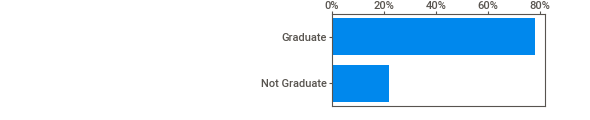
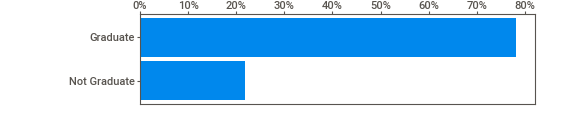
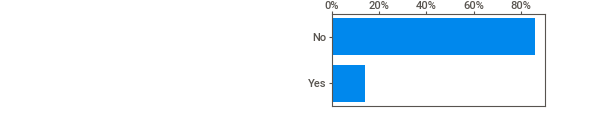
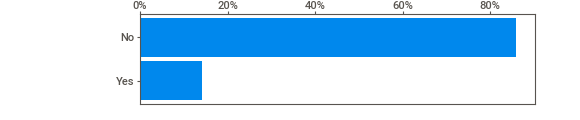
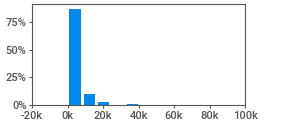
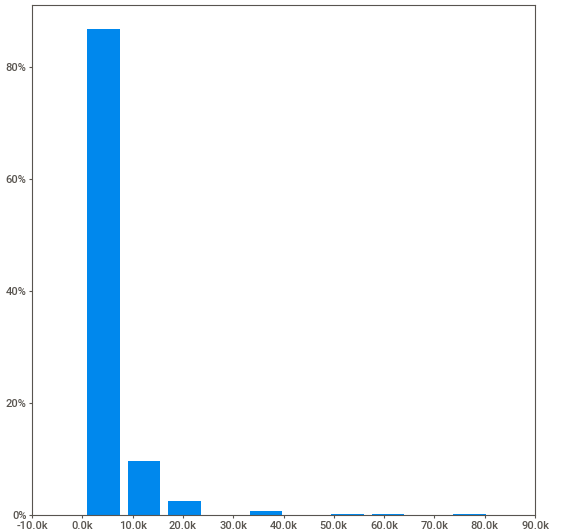
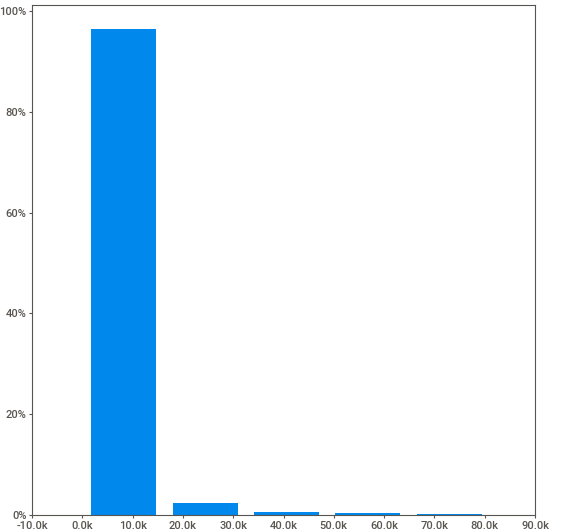
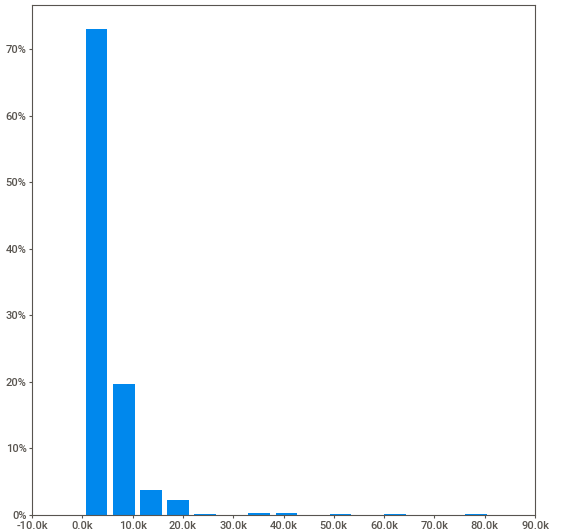
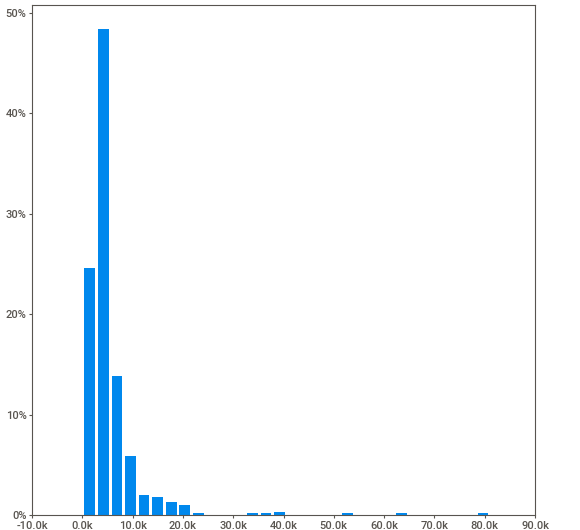
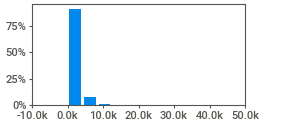
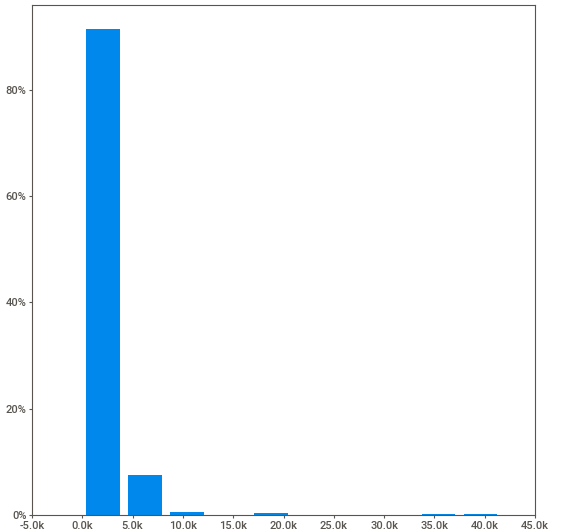
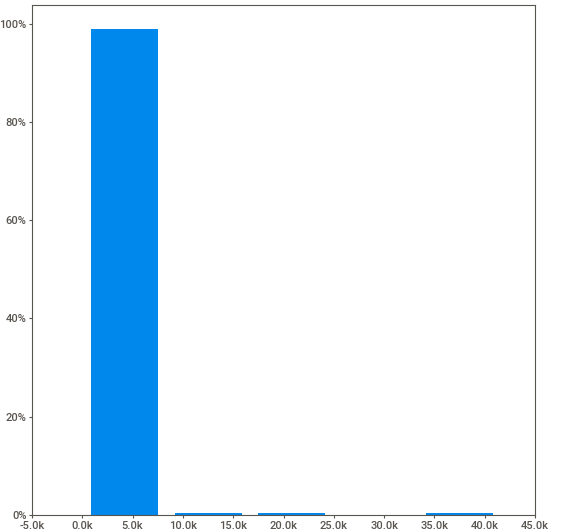
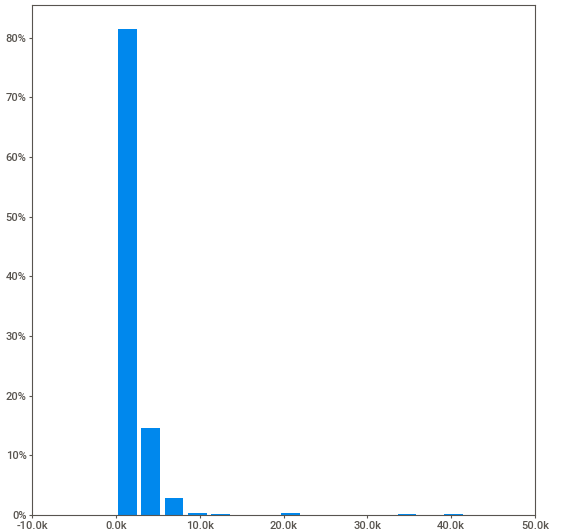
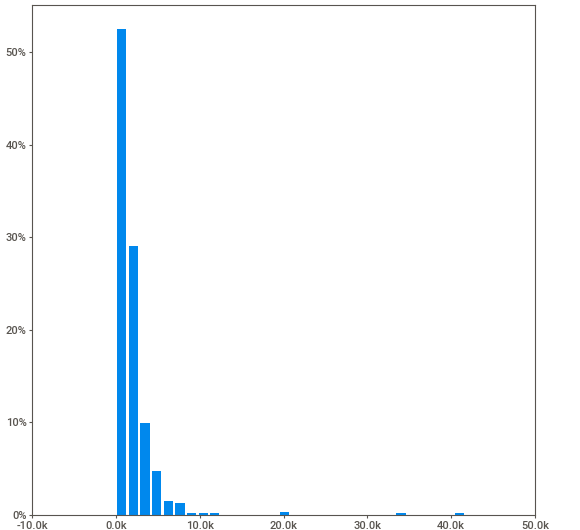
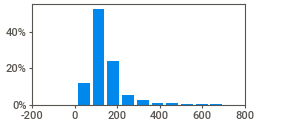
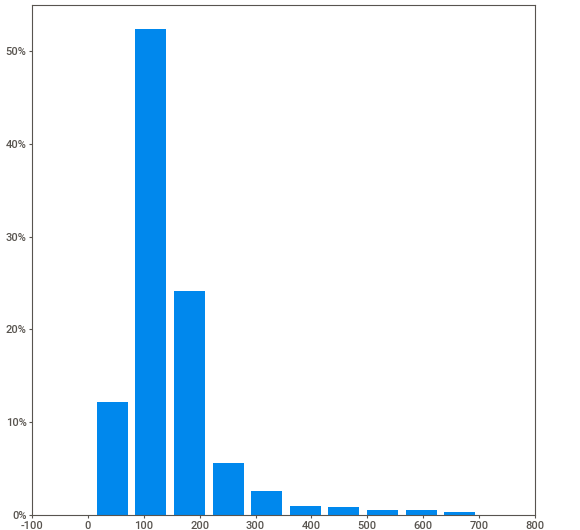
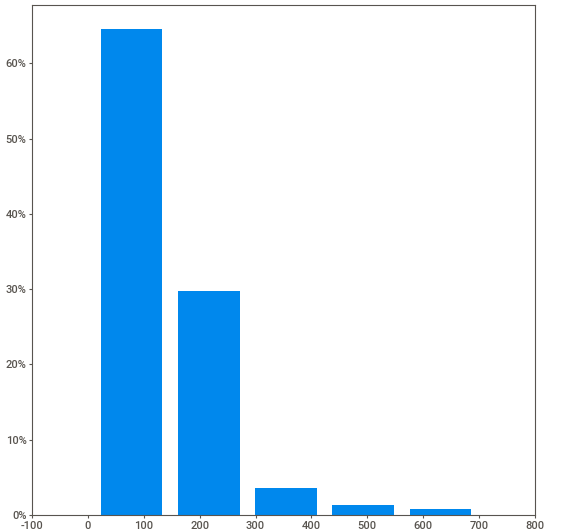
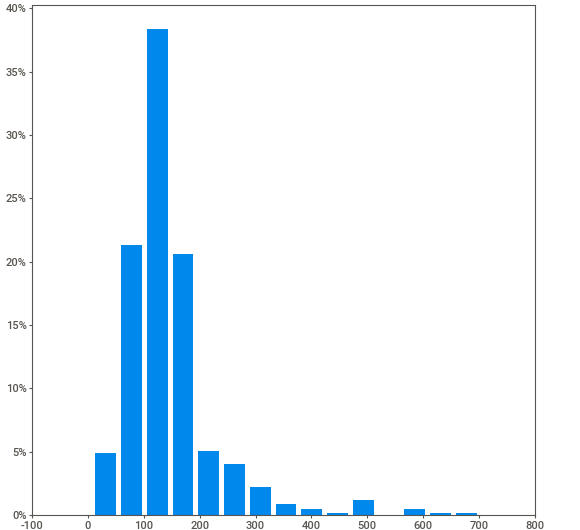
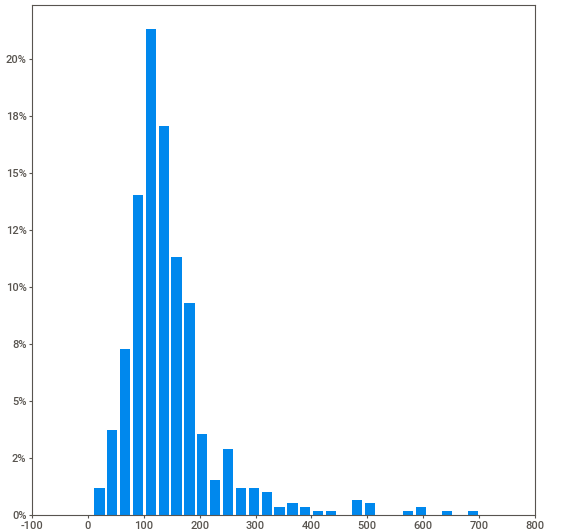
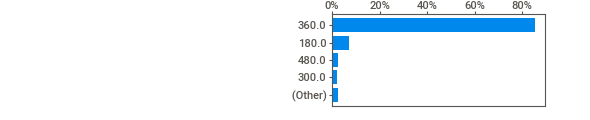
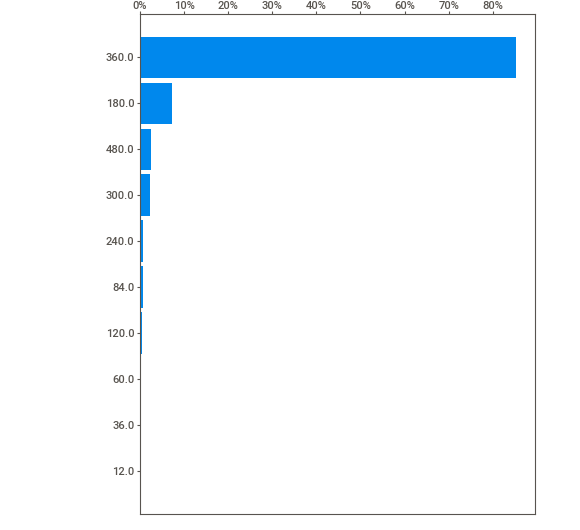
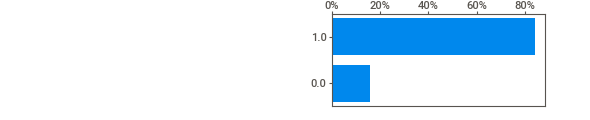
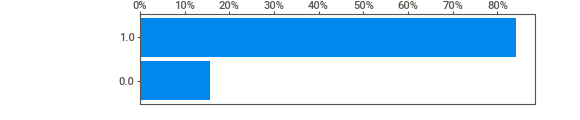
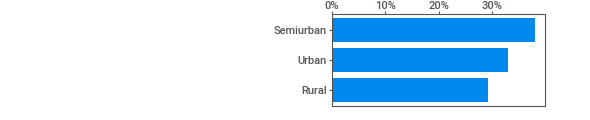
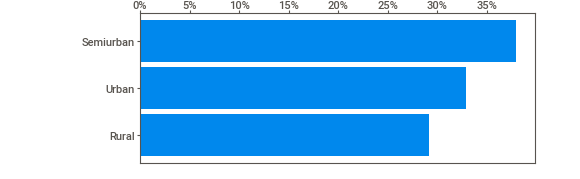
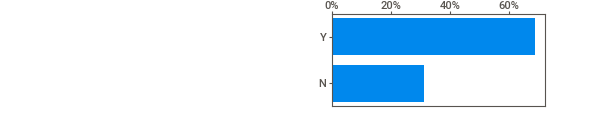
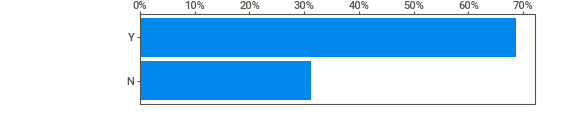
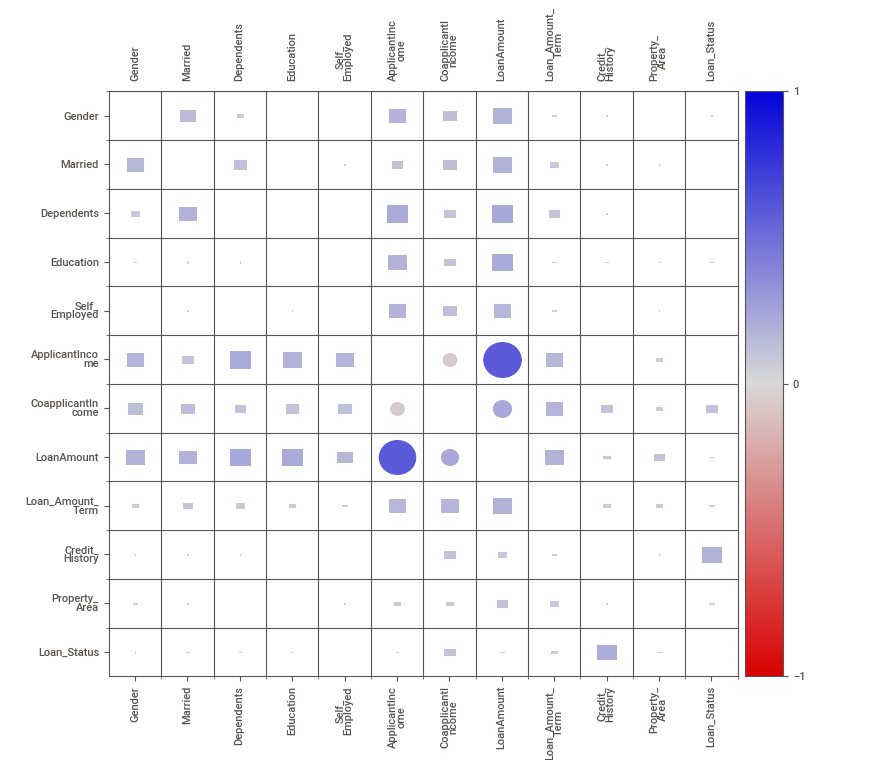
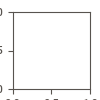

In [15]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

In [16]:
#check duplicate data
train.duplicated().sum()

0

In [17]:
test.duplicated().sum()

0

In [18]:
# check missing data
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History are attribute has missing data records.

In [20]:
# compare the the loan statuses and distribution
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: title={'center': 'loan statuses distribution'}, xlabel='Loan_Status', ylabel='Percentage'>

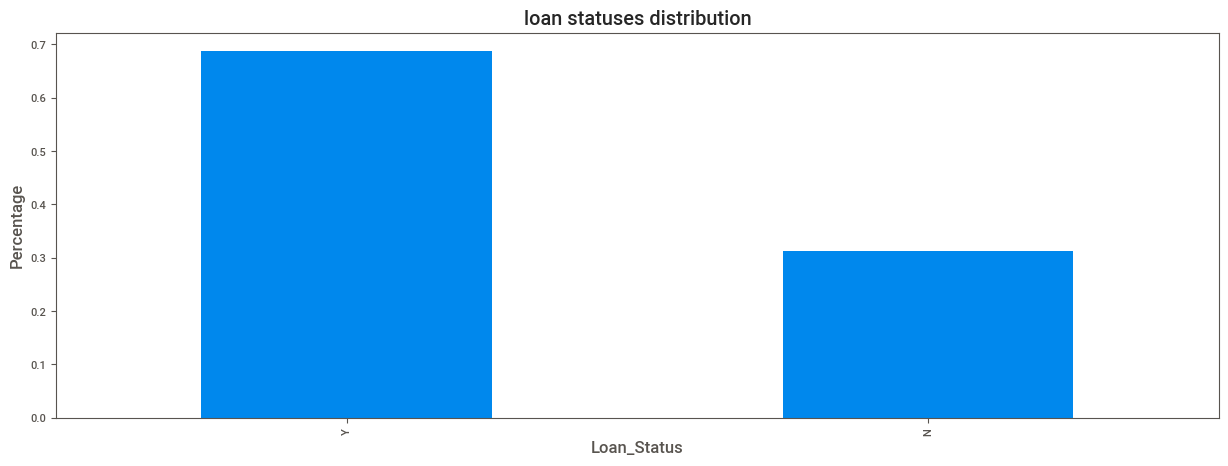

In [22]:
train['Loan_Status'].value_counts(normalize=True).plot(kind='bar',title='loan statuses distribution', xlabel='Loan_Status',ylabel='Percentage')

In [23]:
# compare women and men  when it comes to defaulting on loans in the historical dataset
train[['Gender','Loan_Status']].value_counts()

Gender  Loan_Status
Male    Y              339
        N              150
Female  Y               75
        N               37
dtype: int64

In [24]:
train[['Gender','Loan_Status']].value_counts(normalize=True)

Gender  Loan_Status
Male    Y              0.564060
        N              0.249584
Female  Y              0.124792
        N              0.061564
dtype: float64

<Axes: title={'center': 'compare women and men  when it comes to defaulting on loans in the historical dataset'}, xlabel='Loan_Status', ylabel='Number of applicant'>

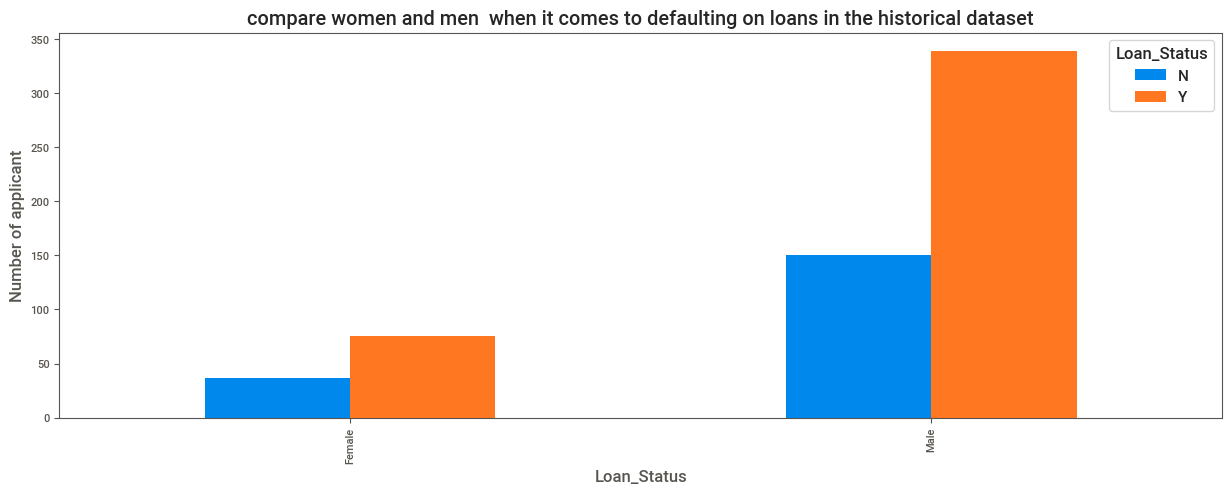

In [25]:
CrosstabResult=pd.crosstab(index=train['Gender'],columns=train['Loan_Status'])
CrosstabResult.plot.bar(title='compare women and men  when it comes to defaulting on loans in the historical dataset', xlabel='Loan_Status',ylabel='Number of applicant')

In [26]:
# How many of the loan applicants have dependents based on the historical dataset?
train[train['Dependents'] != '0'].shape[0]

269

In [27]:
train[train['Dependents'] != '0'].shape[0]/train.shape[0]

0.4381107491856677

In [28]:
# How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?
train.groupby('Self_Employed')['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,500.0,5049.748000,5682.895810,150.0,2824.50,3705.5,5292.75,81000.0
Yes,82.0,7380.817073,5883.564795,674.0,3452.25,5809.0,9348.50,39147.0


In [29]:
# Are applicants with a credit history more likely to default than those who do not have one?
train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

<Axes: title={'center': 'compare credit history effect on loans in the historical dataset'}, xlabel='Loan_Status', ylabel='Number of applicant'>

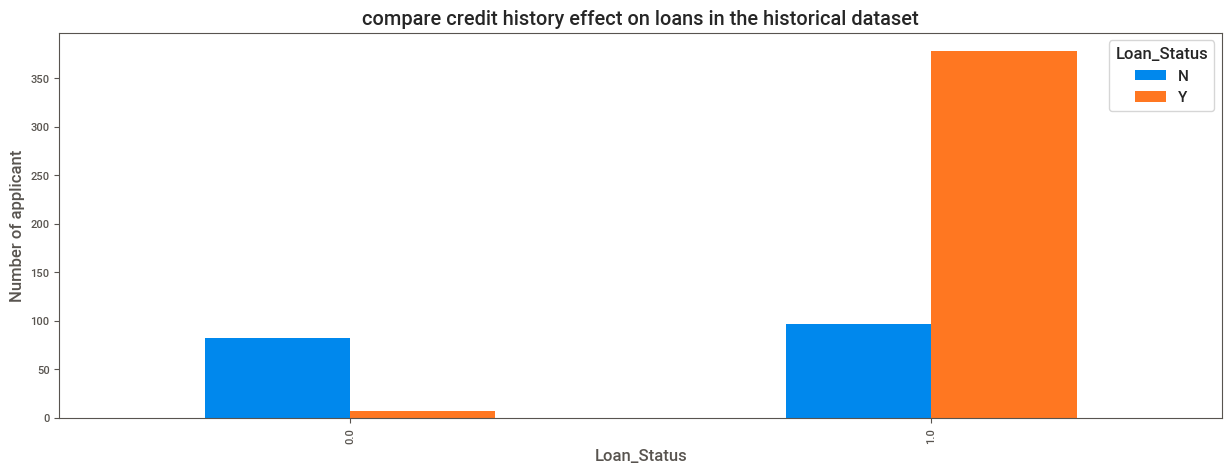

In [30]:
CrosstabResult=pd.crosstab(index=train['Credit_History'],columns=train['Loan_Status'])
CrosstabResult.plot.bar(title='compare credit history effect on loans in the historical dataset', xlabel='Loan_Status',ylabel='Number of applicant')

In [31]:
# Is there a correlation between the applicant's income and the loan amount they applied for?
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


# Analysis Findings

1. An Overview of data:

- The number of records in historical data – 614
- The number of records in new data – 367
- The number of columns – 13
- The number of numerical columns – 5
- The number of categorical columns – 8
- Target/Loan Status – Y (422) vs N (192) 

2. data quality issues exist in both train and test:

Data has missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History, Loan_Status features, Outliers in ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term And No duplicates records in data

3.	How do the the loan statuses compare? i.e. what is the distrubition of each?

422 applications are approved and 192 are declined.

4.	How do women and men compare when it comes to defaulting on loans in the historical dataset?

56.40% Men and 12.47% Women got loan approved.Therefore, males have more applications and get approved relatively more than their counterparts. 

5.	How many of the loan applicants have dependents based on the historical dataset?

254 loan applicants have dependents based on the historical dataset.

6.	How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

Self Employed income is high as compare to who are employed and Loan approval rate is high as well.

7.	Are applicants with a credit history more likely to default than those who do not have one?

378 applicants with a credit history are more likely to default than those who do not have one

8.	Is there a correlation between the applicant's income and the loan amount they applied for?
applicant's income and the loan amount are correlated 57.09%.Therefore, the loan amount of the applicants is correlated with their incomes.

# Data Preprocessing

In [32]:
# Handle Missing data

def preprocessing(data):
    ### 1. Gender
    data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
    
    ### 2. Married
    data['Married'].fillna(data['Married'].mode()[0], inplace = True)
    
    ### 3. Dependents
    data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
    
    ### 4. Self_Employed
    data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
    
    ### 5. LoanAmount
    data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)
    
    ### 6. Loan_Amount_Term
    data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace = True)
    
    ### 7. Credit_History
    data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)
    
    return data

train = preprocessing(train)
test = preprocessing(test)

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
# Handle Outliers in data

def handle_outliers(train,var):
    mean = train[var].mean()
    std = train[var].std()
    train = train[(train[var]< (mean + (3*std))) & (train[var] > (mean - (3*std)))]
    return train
train = handle_outliers(train,'ApplicantIncome')
train = handle_outliers(train,'CoapplicantIncome')
train = handle_outliers(train,'LoanAmount')
train = handle_outliers(train,'Loan_Amount_Term')

# Feature Handling

In [34]:
# Remove 'Loan_ID'
train = train.drop(['Loan_ID'],axis=1)
test = test.drop(['Loan_ID'],axis=1)

In [35]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


train[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']] = train[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']].apply(label_encoder.fit_transform)
test[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']] = test[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']].apply(label_encoder.fit_transform)

In [37]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Feature Selection

Gender               0.018139
Married              0.090368
Dependents           0.017175
Education           -0.093697
Self_Employed       -0.023108
ApplicantIncome     -0.003354
CoapplicantIncome    0.046987
LoanAmount          -0.030337
Loan_Amount_Term    -0.016509
Credit_History       0.558416
Property_Area        0.024773
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


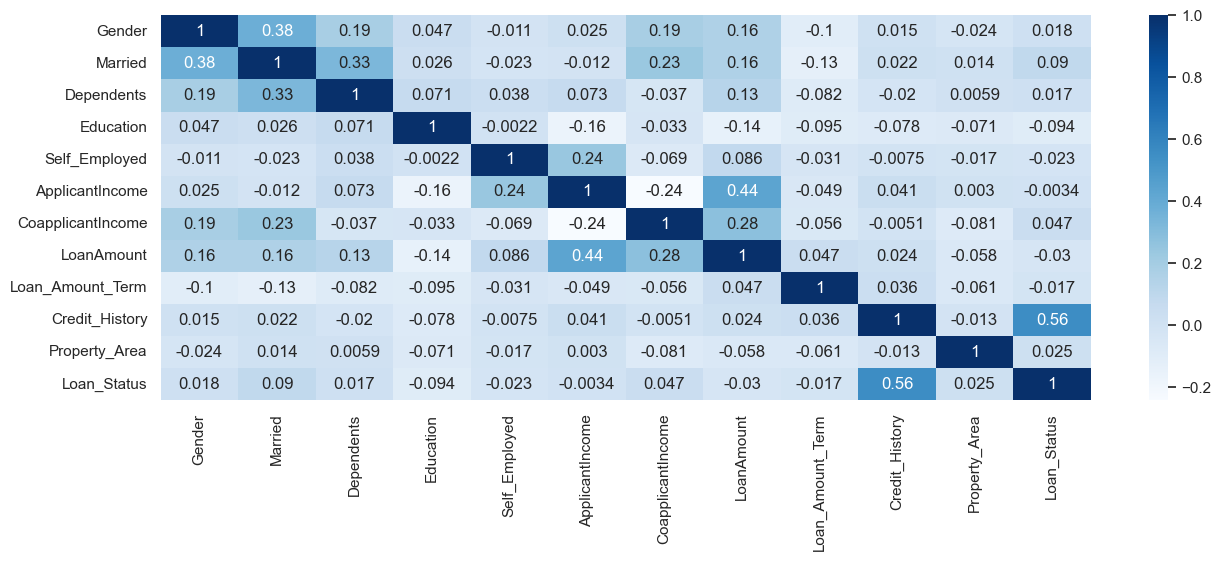

In [38]:
# check correlation between features

#Plot histogram is a representation of the distribution of dataset.
sns.set(rc={'figure.figsize':(15,5)})

# check correlation between the features
corr = train.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
print(corr['Loan_Status'])

<Axes: >

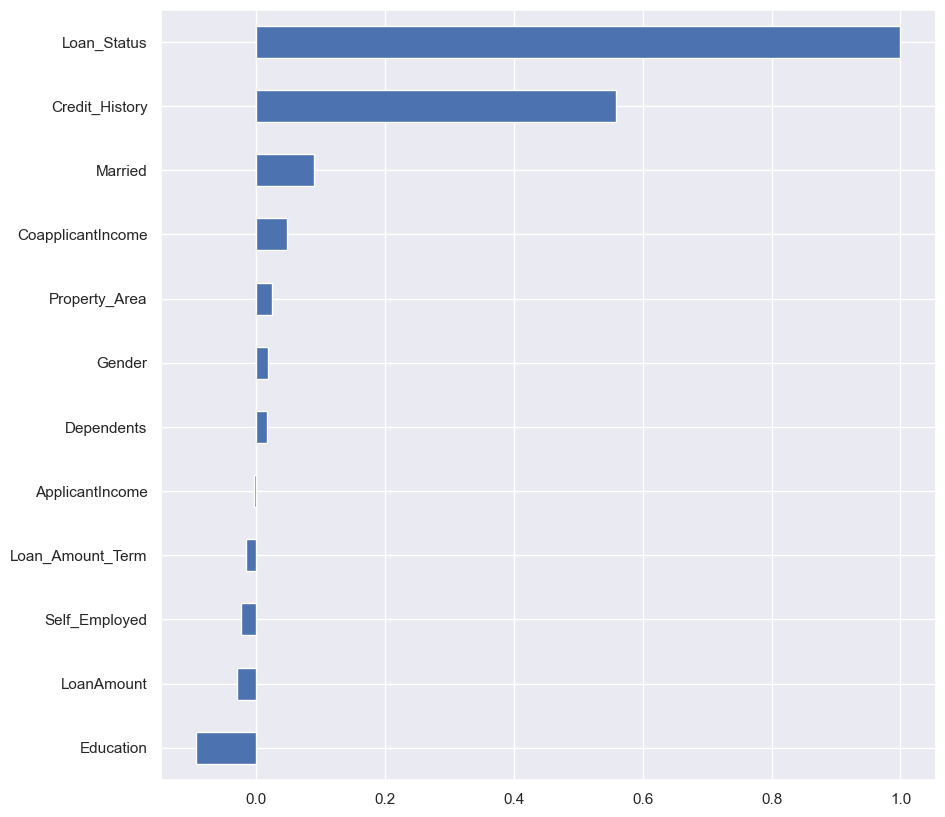

In [39]:
plt.figure(figsize=(10,10))
train.corr()["Loan_Status"].sort_values().plot(kind="barh")


# Cross Validation

In [40]:
# split data into Train and Validate dataset
from sklearn.model_selection import train_test_split

X = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

X_train, X_val , y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=0)

# Data Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scalar.fit_transform(X_val), columns=X_val.columns)
test_scaled = pd.DataFrame(scalar.fit_transform(test), columns=test.columns)

X_train_scaled.shape,X_val_scaled.shape

((402, 11), (173, 11))

In [42]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [43]:
X_train_selected = X_train_scaled
X_val_selected = X_val_scaled

len(Selected_Features)

# Define Model Evaluation Metric

In [44]:
def PerformanceMetric(Model,X_train,X_test,y_train,y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    print('Testing Accuracy:', round(accuracy*100,2),'%')
    print('Testing Precision:', round(precision*100,2),'%')
    print('Testing Recall:', round(recall*100,2),'%')
    print('Testing F1 Score:', round(f1*100,2),'%')
    
    #ROC curve
    fpr, tpr,threshold = roc_curve(y_test,y_pred)
    y_pred - np.rint(y_pred)
        
    #ROC AUC Curve
    roc_auc = roc_auc_score(y_test,y_pred)
    plt.figure(figsize=(15,5))
    plt.plot(fpr,tpr,label='(area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    #confusion metrix
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(15,5))
    plt.title("Confusion Matrix")
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()
    
    return accuracy,precision,recall,f1
    

In [45]:
PerformanceResults = []

# Modeling

### 1. Logistic Regression

Assumptions for Logistic Regression:
- The 'Loan_Status' is a categorical variable.
- The independent variable does not have multi-collinearity.

In [46]:
# define models and parameters
Start_time = time.time()
Log_Reg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = np.logspace(-5, 8, 15)

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

Log_reg_grid_search = GridSearchCV(estimator=Log_Reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
Log_reg_grid_result = Log_reg_grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (Log_reg_grid_result.best_score_, Log_reg_grid_result.best_params_))

# check recall on test set
y_val_predict = Log_reg_grid_result.predict(X_val)

Best: 0.713584 using {'C': 3.727593720314938, 'penalty': 'l2', 'solver': 'lbfgs'}


Testing Accuracy: 84.97 %
Testing Precision: 83.92 %
Testing Recall: 97.56 %
Testing F1 Score: 90.23 %


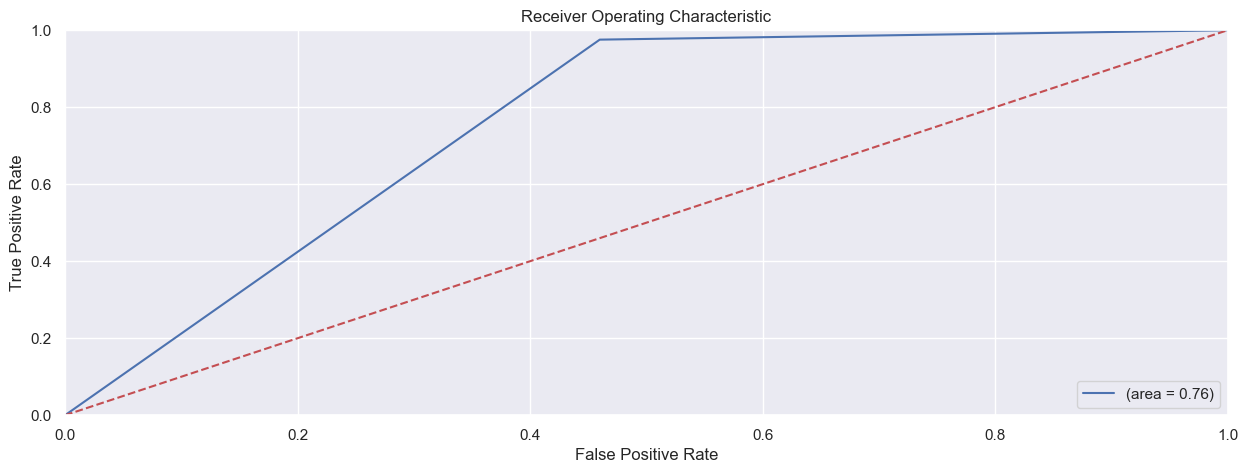

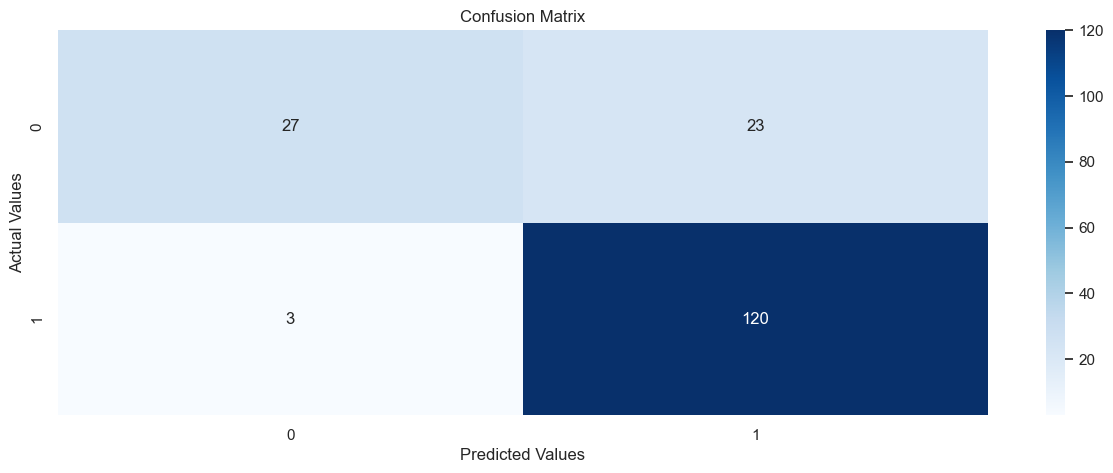

Model Train Time Taken: 18.02396273612976


In [47]:
accuracy,precision,recall,f1 = PerformanceMetric(Log_reg_grid_search,X_train,X_val,y_train,y_val,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['Logistic Regression',accuracy,precision,recall,f1, time.time()-Start_time])

### 2. KNN

In [48]:
# grid searching key hyperparametres for KNeighborsClassifier
Start_time = time.time()

# define models and parameters
KNN = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

KNN_grid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
KNN_grid_result = KNN_grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (KNN_grid_result.best_score_, KNN_grid_result.best_params_))

# check recall on test set
y_val_predict = KNN_grid_result.predict(X_val)

Best: 0.587959 using {'metric': 'euclidean', 'n_neighbors': 5}


Testing Accuracy: 61.27 %
Testing Precision: 69.72 %
Testing Recall: 80.49 %
Testing F1 Score: 74.72 %


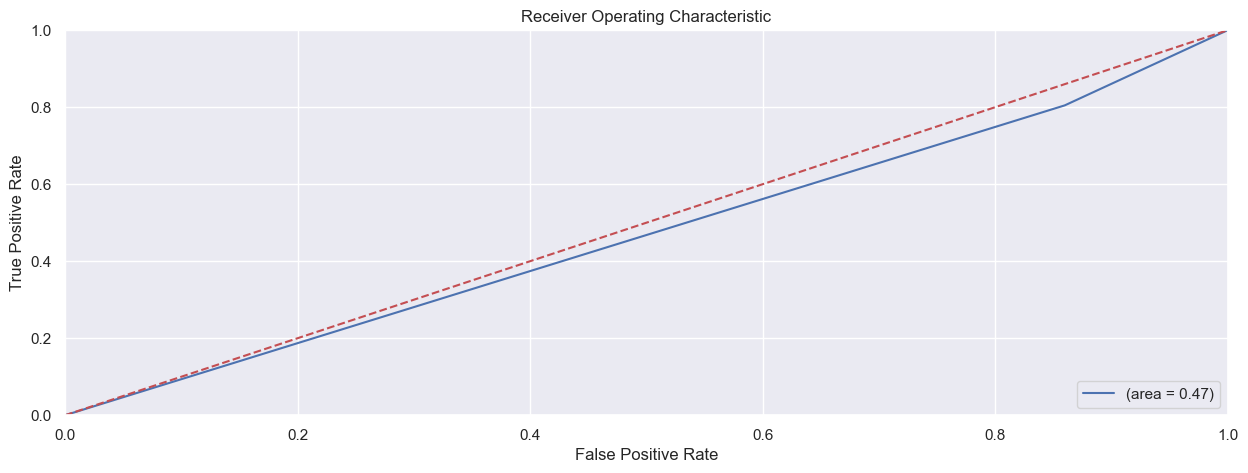

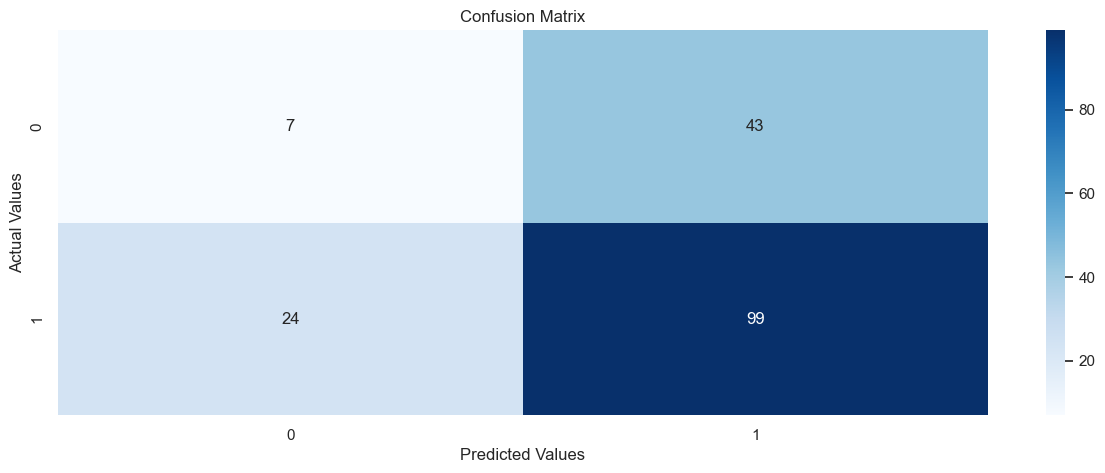

Model Train Time Taken: 1.9360008239746094


In [49]:
accuracy,precision,recall,f1 = PerformanceMetric(KNN_grid_search,X_train,X_val,y_train,y_val,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['K Neighbors Classifier',accuracy,precision,recall,f1,time.time()-Start_time])

### 3. Random Forest

In [50]:
# grid searching key hyperparameters for RandomForestClassifier
Start_time= time.time()

# define models and parameters
RF = RandomForestClassifier()
n_estimators = [5,10,15]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

RF_grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
RF_grid_result = RF_grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (RF_grid_result.best_score_, RF_grid_result.best_params_))

# check recall on test set
y_val_predict = RF_grid_result.predict(X_val)

Best: 0.758874 using {'max_features': 'sqrt', 'n_estimators': 15}


Testing Accuracy: 83.24 %
Testing Precision: 84.06 %
Testing Recall: 94.31 %
Testing F1 Score: 88.89 %


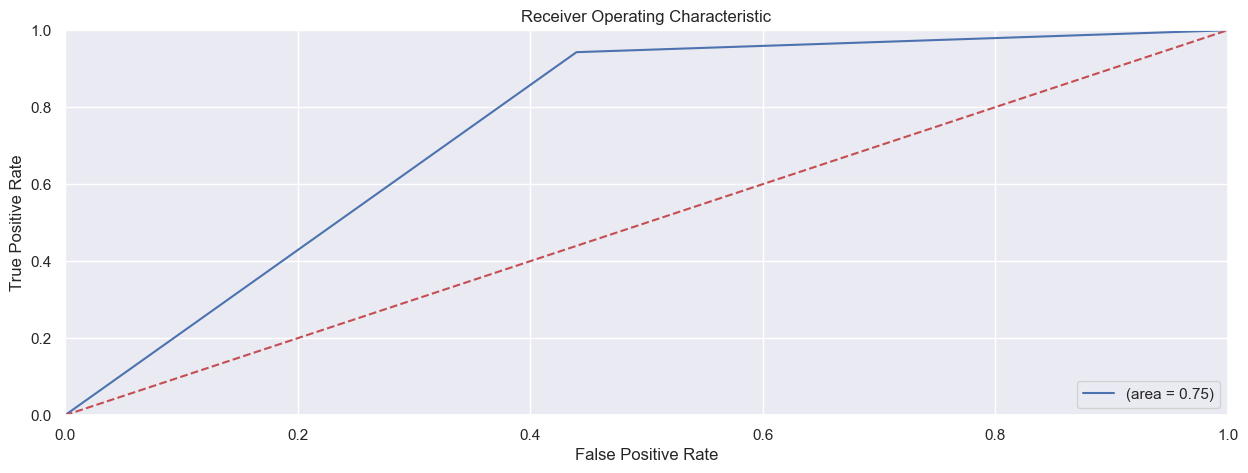

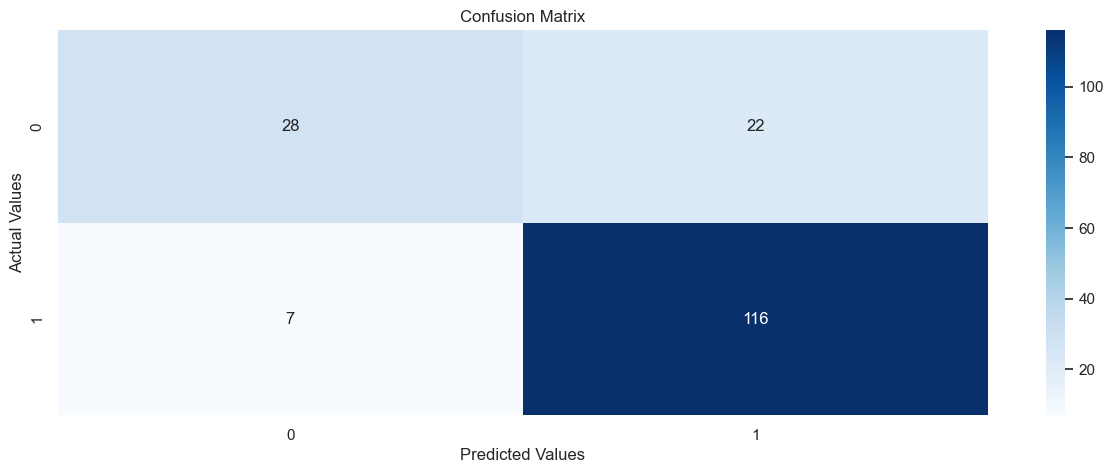

Model Train Time Taken: 1.4720051288604736


In [51]:
accuracy,precision,recall,f1 = PerformanceMetric(RF_grid_search,X_train,X_val,y_train,y_val,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['Random Forest Classifier',accuracy,precision,recall,f1,time.time()-Start_time])

### 4. Gradient Tree Boosting

In [52]:
#grid searching key hyperparameters for GradientBoostingClassifier

Start_time = time.time()
# define models and parameters
GB = GradientBoostingClassifier()
n_estimators = [5, 10, 15]
learning_rate = [0.001, 0.01, 0.1]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
GB_grid_search = GridSearchCV(estimator=GB, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
GB_grid_result = GB_grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (GB_grid_result.best_score_, GB_grid_result.best_params_))

# check recall on test set
y_val_predict = GB_grid_result.predict(X_val)

Best: 0.737296 using {'learning_rate': 0.1, 'n_estimators': 15}


Testing Accuracy: 84.97 %
Testing Precision: 83.92 %
Testing Recall: 97.56 %
Testing F1 Score: 90.23 %


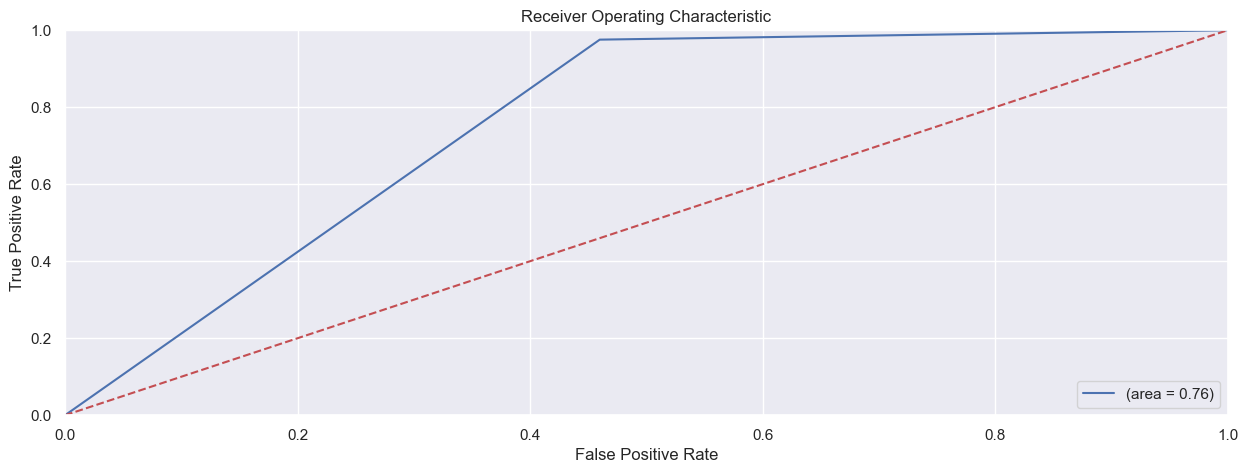

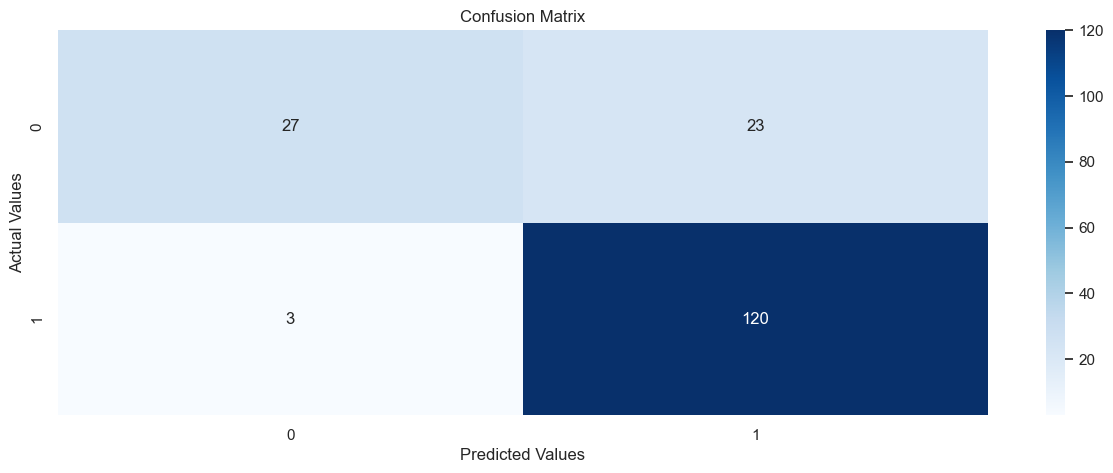

Model Train Time Taken: 1.456003189086914


In [53]:
accuracy,precision,recall,f1 = PerformanceMetric(GB_grid_search,X_train,X_val,y_train,y_val,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['Gradient Boosting Classifier',accuracy,precision,recall,f1,time.time()-Start_time])

### 5. XGBoost

In [54]:
#grid searching key hyperparameters for GradientBoostingClassifier
Start_time = time.time()

# define models and parameters
XGB = XGBClassifier()

# A parameter grid for XGBoost
grid = {"learning_rate": (0.001, 0.01, 0.1),
        'min_child_weight': [1, 5, 10],
        'gamma': [ 0.0, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [ 0.3, 0.4],
        'max_depth': [3, 4, 5]
        }

# define grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
XGB_grid_search = GridSearchCV(estimator=XGB, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
XGB_grid_result = XGB_grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (XGB_grid_result.best_score_, XGB_grid_result.best_params_))

# check recall on test set
y_val_predict = XGB_grid_result.predict(X_val)

[22:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.760895 using {'colsample_bytree': 0.4, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}


Testing Accuracy: 80.92 %
Testing Precision: 83.58 %
Testing Recall: 91.06 %
Testing F1 Score: 87.16 %


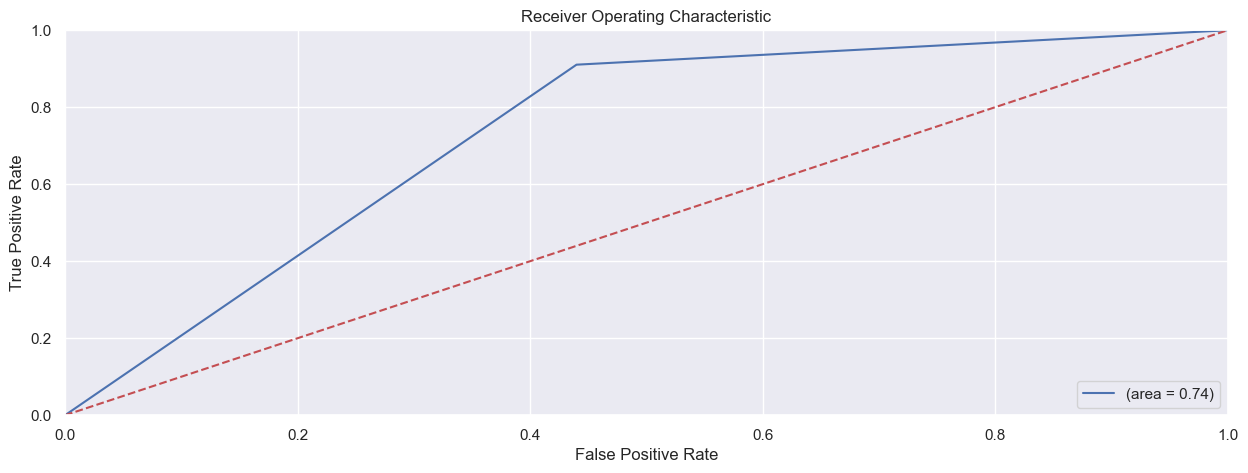

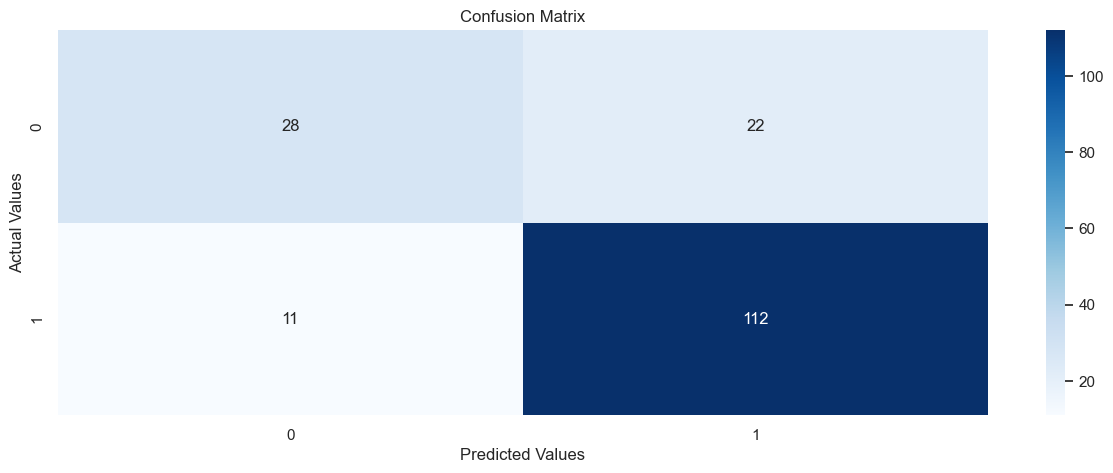

Model Train Time Taken: 383.6639950275421


In [55]:
accuracy,precision,recall,f1 = PerformanceMetric(XGB_grid_search,X_train,X_val,y_train,y_val,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['XGBoost Classifier',accuracy,precision,recall,f1,time.time()-Start_time])

# Model Evaluation

In [56]:
Report = pd.DataFrame(PerformanceResults,columns=['Model','Accuracy','Precision','Recall','F1Score','TrainingTime'])
Report

,Model,Accuracy,Precision,Recall,F1Score,TrainingTime
0,Logistic Regression,0.849711,0.839161,0.975610,0.902256,18.023963
1,K Neighbors Classifier,0.612717,0.697183,0.804878,0.747170,1.936001
2,Random Forest Classifier,0.832370,0.840580,0.943089,0.888889,1.472005
3,Gradient Boosting Classifier,0.849711,0.839161,0.975610,0.902256,1.456003
4,XGBoost Classifier,0.809249,0.835821,0.910569,0.871595,383.663995


# Model Assessment

In [57]:
joblib.dump(Log_reg_grid_search,'Loan_Status.pkl')

['Loan_Status.pkl']

In [58]:
y_test_predict = Log_reg_grid_result.predict(test)

In [59]:
test['Loan_Status'] = y_test_predict

In [60]:
test['Loan_Status'].value_counts()

1    307
0     60
Name: Loan_Status, dtype: int64

In [61]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1


### Recommendation

- Gradient Boosting Classifier can perform better results with adding the more number of records in the train data.
- Logistic Classifier is good for baseline model. However, It can be overfit the performation in production. 

### future improvements

- Add More Data

Adding more number of records in dataset, we can train better and more accurate machine-learning model.